<a href="https://colab.research.google.com/github/waghvaishnav/Unsupervised-Machine-Learning-Algorithms-and-Techniques-Lab-/blob/main/ELBOW_method_with_K_Means_Clustering_in_unsup_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing datasets :
import pandas as pd
from google.colab import files
files.upload()


Saving income[1].csv to income[1].csv


{'income[1].csv': b'Name,Age,Income($)\r\nRob,27,70000\r\nMichael,29,90000\r\nMohan,29,61000\r\nIsmail,28,60000\r\nKory,42,150000\r\nGautam,39,155000\r\nDavid,41,160000\r\nAndrea,38,162000\r\nBrad,36,156000\r\nAngelina,35,130000\r\nDonald,37,137000\r\nTom,26,45000\r\nArnold,27,48000\r\nJared,28,51000\r\nStark,29,49500\r\nRanbir,32,53000\r\nDipika,40,65000\r\nPriyanka,41,63000\r\nNick,43,64000\r\nAlia,39,80000\r\nSid,41,82000\r\nAbdul,39,58000\r\n\r\n\r\n'}

/tmp/ipython-input-232211853.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


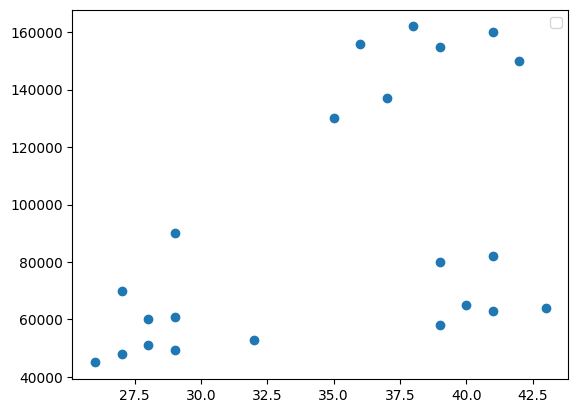

In [30]:
import matplotlib.pyplot as plt
df = pd.read_csv("income[1].csv")
df.head()

plt.scatter(df['Age'],df['Income($)'])
plt.legend()

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters=3,n_init="auto")

scaled =MinMaxScaler()

df_scaled = pd.DataFrame(columns=["Age","Income($)"])
df_scaled[["Age","Income($)"]] = scaled.fit_transform(df[["Age","Income($)"]])


In [41]:
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [45]:
kmc.fit(df_scaled[["Age","Income($)"]])

cluster_result = kmc.predict(df_scaled[["Age","Income($)"]])

df["cluster_result"] = cluster_result

In [46]:
cluster_result

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

/tmp/ipython-input-3394390445.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


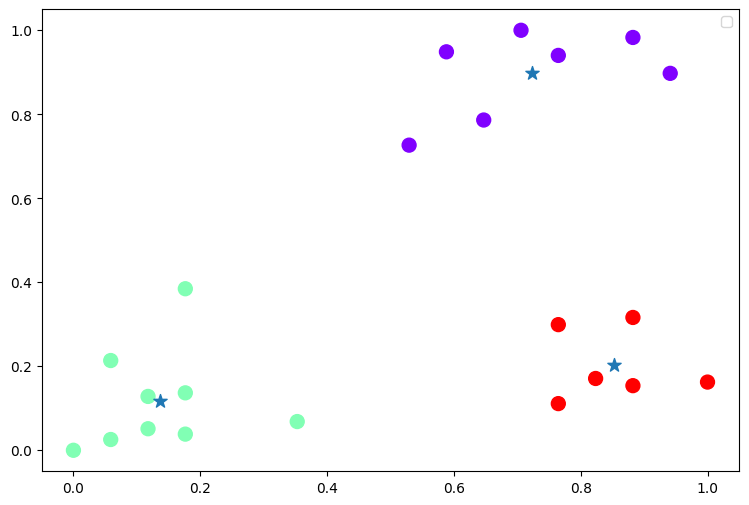

In [62]:
centroid = kmc.cluster_centers_
centroid

plt.figure(figsize=(9,6))
plt.scatter(df_scaled['Age'],df_scaled['Income($)'],c=cluster_result,cmap="rainbow",s=100)
plt.scatter(centroid[:,0],centroid[:,1],marker="*",s=100)
plt.legend()

# Elbo method to determine the optimal number of cluster :

In [71]:
sse = [] # sum of the squared error.

k_rng = range(1,10)

for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit(df_scaled[["Age","Income($)"]])
  sse.append(km.inertia_)

print("sum of squared error :")
sse

sum of squared error :


[5.434011511988179,
 2.4571335359046356,
 0.4750783498553097,
 0.42015522057314425,
 0.32443403666256826,
 0.2824643690681409,
 0.20548769627526323,
 0.17954643892337974,
 0.11509777717449324]

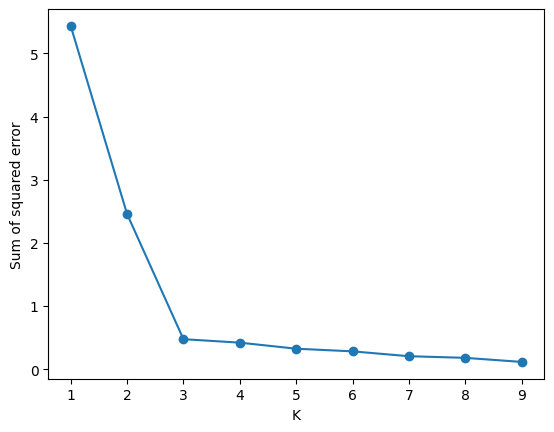

In [75]:
# visualization of the elbo method :

plt.scatter(k_rng,sse)
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()